(sec_outlier_processing)=
# Xử lý các giá trị ngoại lệ

Giá trị ngoại lệ [^1] (_outliers_) trong dữ liệu là gì?

Với dạng số, dữ liệu ngoại lệ có thể là một giá trị phi thực tế như số tuổi âm, hoặc một giá trị khác xa với phần còn lại của các giá trị trong trường đó.
Với dạng hạng mục, dữ liệu ngoại lệ có thể là một giá trị phi thực tế như một hạng mục nằm ngoài những khả năng có thể xảy ra như một địa danh không có trên bản đồ.
Các giá trị có tần xuất xảy ra vô cùng thấp trong một cột dữ liệu cũng có _khả năng_ [^2] là một giá trị ngoại lệ.

(sec_numeric_outliers)=
## Dữ liệu số

Các phép biến đổi số học tương đối nhạy cảm với các giá trị ngoại lệ (quá lớn hoặc quá nhỏ). Đặc biệt, nếu ta muốn xây dựng đặc trưng dựa trên trung bình của một cột, các giá trị ngoại lệ có thể làm thay đổi trung bình đáng kể. Ví dụ, ngôi làng A có 100 ngôi nhà, trong đó 99 ngôi nhà có thu nhập 1 triệu/tháng. Ngôi nhà còn lại của một anh đại gia có thu nhập 3 tỉ/tháng. Như vậy "thu nhập bình quân" của ngôi làng là gần 33 triệu/tháng. Một ngôi làng B khác có mọi nhà đều thu nhập vào khoảng 5-10 triệu/tháng. Nếu một công ty muốn mở cửa hàng tạp hóa dựa trên thu nhập bình quân đầu người của mỗi làng thì rõ ràng ngôi làng A được đánh giá cao hơn mặc dù trên thực tế, ngôi làng B có mức sống cao hơn.

Các giá trị ngoại lệ cũng ảnh hưởng lớn đến chất lượng mô hình machine learning. Xét ví dụ đơn giản dưới đây.

Có một bảng dữ liệu với chiều cao được lưu trong cột `height` và cân nặng được lưu trong `weight`. Giả sử cột `height_2` là một phiên bản của `height` với chỉ một sự khác biệt ở chiều cao của người đầu tiên là 110cm thay vì 147cm. Cột `weight_2` chỉ khác cột `weight` ở dòng thứ hai với cân nặng 90kg thay vì 50 kg. Dòng đầu tiên trong `height_2` và dòng thứ hai trong `weight_2` có thể coi là các giá trị ngoại lệ. Các giá trị này có thể do sai số ghi chép hoặc thực sự đó là dữ liệu thật.

In [1]:
import pandas as pd
df_example = pd.DataFrame(
    data={
        "height": [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight": [49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
        "height_2": [110, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight_2": [49, 90, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
    }
)
df_example

,height,weight,height_2,weight_2
0,147,49,110,49
1,150,50,150,90
2,153,51,153,51
3,158,54,158,54
4,163,58,163,58
5,165,59,165,59
6,168,60,168,60
7,170,62,170,62
8,173,63,173,63
9,175,64,175,64


Giả sử ta cần dùng bộ dữ liệu này để xây dựng một mô hình dự đoán cân nặng theo chiều cao. Ta có thể thấy rằng cân nặng _thường_ tỉ lệ thuận với chiều cao nên mô hình hồi quy tuyến tính sẽ phù hợp cho công việc này. Hình vẽ dưới đây thể hiện kết quả mà mô hình hồi quy tuyến tính học được trong ba trường hợp:

* TH1 (trái): dùng dữ liệu trong cột `height` làm đầu vào, trong cột `weight` làm nhãn.
* TH2 (giữa): dùng dữ liệu trong cột `height_2` làm đầu vào, trong cột `weight` làm nhãn.
* TH3 (phải): dùng dữ liệu trong cột `height` làm đầu vào, trong cột `weight_2` làm nhãn.

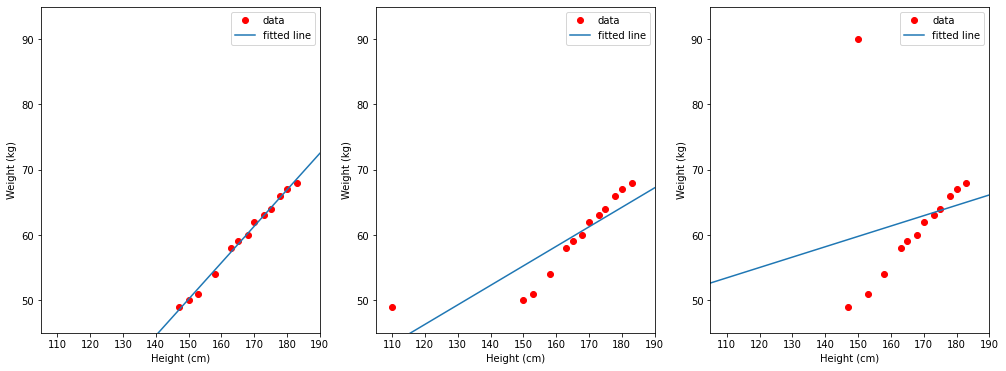

In [2]:
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression


def fit_linear_regression_and_visualize(
    df: pd.DataFrame, input_col: str, label_col: str
):
    # fit the model by Linear Regression
    lin_reg = LinearRegression(fit_intercept=True)
    lin_reg.fit(df[[input_col]], df[label_col])
    w1 = lin_reg.coef_
    w0 = lin_reg.intercept_

    # visualize
    plt.plot(df[input_col], df[label_col], "ro", label="data")
    plt.axis([105, 190, 45, 75])
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.ylim(45, 95)
    plt.plot([105, 190], [w1 * 105 + w0, w1 * 190 + w0], label="fitted line")
    plt.legend()


plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 1)
fit_linear_regression_and_visualize(df_example, input_col="height", label_col="weight")

plt.subplot(1, 3, 2)
fit_linear_regression_and_visualize(df_example, input_col="height_2", label_col="weight")

plt.subplot(1, 3, 3)
fit_linear_regression_and_visualize(df_example, input_col="height", label_col="weight_2")

Các điểm màu đỏ thể hiện các điểm dữ liệu với trục hoành là cân nặng và trục tung là chiều cao. Đường thẳng màu xanh là đường thằng mà mô hình hồi quy tuyến tính học được. Ta có thể thấy rằng đường màu xanh trong hình bên trái khá khớp dữ liệu, trong khi hai đường thẳng ở hai trường hợp còn lại bị lệch đi khá nhiều dù chỉ có một điểm dữ liệu ngoại lệ trong mỗi trường hợp.

Như vậy, với dữ liệu rất đơn giản này, dữ liệu ngoại lệ dù ở đầu vào mô hình hay nhãn đều mang lại kết quả không tốt.

## Xác định và xử lý các điểm ngoại lệ

Có hai nhóm các giá trị ngoại lệ:

* Các giá trị không nằm trong miền xác định của dữ liệu. Ví dụ, tuổi, thu nhập hay khoảng cách không thể là số âm.

* Các giá trị có khả năng xảy ra nhưng xác suất rất thấp. Ví dụ, 120 tuổi, thu nhập 1 triệu đô la/tháng. Những giá trị này có khả năng xảy ra nhưng thực sự hiếm có.

Nhìn chung, chúng ta luôn có thể xóa bỏ cột hoặc hàng có dữ liệu ngoại lệ. Nếu xóa bỏ cột, ta có thể lãng phí rất nhiều các giá trị không phải ngoại lệ ở các hàng khác. Nếu xóa bỏ hàng, chúng ta cần lưu ý tới cách xử lý với dữ liệu mới. Tức là nếu một điểm dữ liệu mới cũng có giá trị ngoại lệ thì sao? Ta không thể bỏ không dự đoán điểm đó mà phải có cách biến đổi dữ liệu ngoại lệ này về những giá trị hợp lý hơn.

Với dữ liệu thuộc nhóm thứ nhất, ta có thể thay nó bằng `nan` và coi như một giá trị bị khuyết. Đôi khi những giá trị bị khuyết được mã hóa bằng một giá trị đặc biệt không nằm trong miền giá trị khả dĩ của dữ liệu. Khi coi chúng là giá trị bị khuyết, ta có thể xử lý tiếp như trong `ref{sec_missing_data}`.

Với dữ liệu thuộc nhóm thứ hai, người ta thường dùng phương pháp chặn trên hoặc chặn dưới (_clipping_ hay _capping_). Tức là khi một giá trị quá lớn hoặc quá nhỏ, ta đưa nó về giá trị lớn nhất/nhỏ nhất được coi là những điểm bình thường. Ví dụ với một giá trị của tuổi là 120, ta có thể đưa nó về 70 và giả sử như điểm dữ liệu này có những đặc tính chung của "người cao tuổi". Một điểm đáng lưu ý là việc chọn giá trị lớn nhất/nhỏ nhất cũng tùy thuộc vào dữ liệu. Nếu dữ liệu chỉ toàn bao gồm người cao tuổi tử 65 trở lên thì rõ ràng chặn trên bởi 70 là không hợp lý vì 70 vẫn là quá trẻ trong bộ dữ liệu này.

Vậy làm thế nào để chọn những giá trị lớn nhất, nhỏ nhất đó?

Cách phổ biến nhất là sử dụng {ref}`sec_boxplot`. Box plot vừa giúp xác định xem dữ liệu có điểm ngoại lệ không, vừa giúp tìm ra ngưỡng lớn nhất và nhỏ nhất để làm điểm cắt.

### Box plot

Để minh họa cho cách sử dụng box plot, ta sẽ sử dụng bộ dữ liệu California Housing

In [3]:
import pandas as pd

housing_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/california_housing/"
df_housing = pd.read_csv(housing_path + "housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Dưới đây là histogram và box plot của cột `total_rooms`. Ở đâ, box plot được vẽ ở dạng nằm ngang để so sánh với histogram.

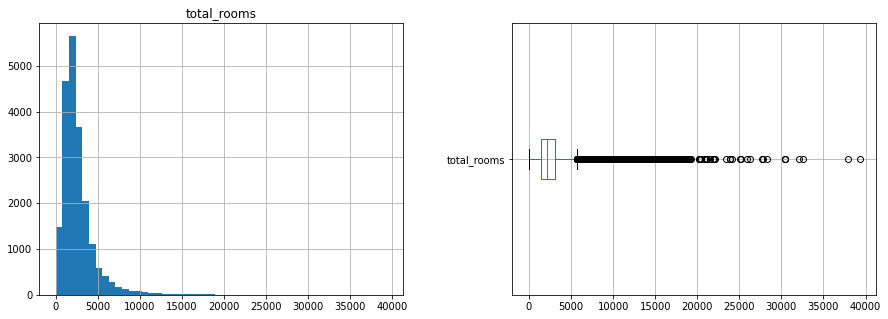

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_housing[["total_rooms"]].hist(bins=50, ax=axes[0]);
df_housing[["total_rooms"]].boxplot(ax=axes[1], vert=False);

Từ histogram ta thấy dữ liệu bị lệch phải (có điểm ngoại lệ lệch nhiều về bên phải, hoặc "đuôi" của histogram nằm ở bên phải). Từ boxplot ta thấy có khá nhiều điểm được coi là ngoại lệ.
Các điểm ngoại lệ có thể được xử lý bằng cách _clip_ về giá trị cực tiểu và cực đại của Box plot. Bộ xử lý này có thể được triển khai dưới dạng sklearn API như sau:

In [5]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

Áp dụng lại vào dữ liệu của cột `total_rooms` ta có histogram và boxplot mới như sau:

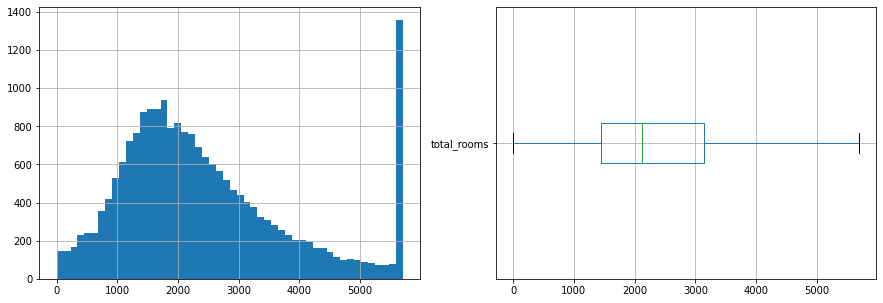

In [6]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df_housing["total_rooms"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

Sau khi clip dữ liệu theo cực tiểu và cực đại của box plot, ta thấy rằng dữ liệu _đỡ_ bị lệch đi. Box plot cũng cho thấy không còn điểm dữ liệu ngoại lệ nào.

```{margin}
Su khi clip dữ liệu bằng cực đại và cực tiểu của boxplot, dữ liệu mới luôn luôn không có điểm ngoại lệ. Điều này đạt được vì phép biến đổi clip không làm thay đổi tứ phân vị của dữ liệu. Khoảng "hợp lệ" của boxplot trước và sau clip không thay đổi.
```

Tiếp theo, ta thử áp dụng phương pháp này vào ví dụ đầu tiên.

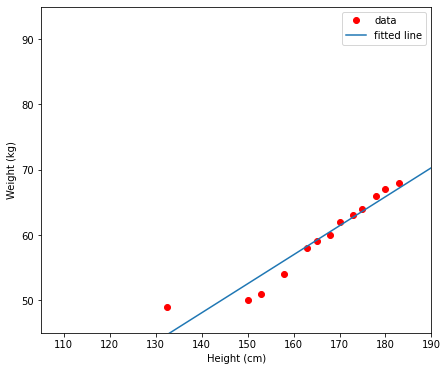

In [7]:
df_example["height_2_clipped"] = BoxplotOutlierClipper().fit_transform(
    df_example["height_2"]
)

plt.figure(figsize=(7, 6))
fit_linear_regression_and_visualize(
    df_example, input_col="height_2_clipped", label_col="weight"
)

Như vậy, sau khi xử lý điểm dữ liệu ngoại lệ, mô hình học được (đường thẳng màu xanh) cho kết quả hợp lý hơn.

### Z score

Nếu bạn tin rằng các giá trị trong một trường dữ liệu tuân theo phân phối chuẩn, bạn có thể áp dụng quy tắc $3 \sigma$ cho phân phối chuẩn.

Trong phân phối chuẩn, giả sử $\mu$ là kỳ vọng và $\sigma$ là độ lệch chuẩn.
Quy tắc $3 \sigma$ cho phân phối chuẩn nói rằng:

* 68% các điểm dữ liệu nằm trong khoảng $\mu \pm \sigma$
* 95% các điểm dữ liệu nằm trong khoảng $\mu \pm 2\sigma$
* 99.7% các điểm dữ liệu nằm trong khoảng $\mu \pm 3\sigma$

Với một điểm dữ liệu $x$, z score của nó được tính bởi:

$$
\frac{x - \mu}{\sigma}
$$

Những điểm có z score nằm ngoài đoạn $[-3, 3]$ có thể được coi là các điểm ngoại lệ. Biến đổi toán học một chút, việc này tương đương với việc các điểm nằm ngoài đoạn $[\mu - 3\sigma, \mu + 3\sigma]$ được coi là các điểm ngoại lệ.

In [8]:
class ZscoreOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, z_threshold: float = 3):
        self.z_threshold = z_threshold
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        mean = X.mean()
        std = X.std()
        self.lower = mean - self.z_threshold * std
        self.upper = mean + self.z_threshold * std
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

Áp dụng vào dữ liệu của cột `total_rooms` ta có.

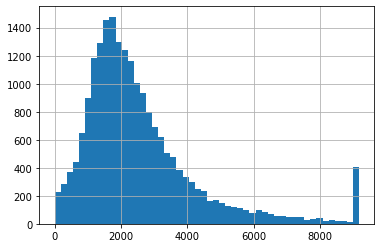

In [9]:
clipped_total_rooms2 = ZscoreOutlierClipper().fit_transform(df_housing["total_rooms"])
clipped_total_rooms2.hist(bins=50);

Ta có một vài nhận xét dưới đây:

* So với box plot, z score trong trường hợp này trả về khoảng giá trị rộng hơn. Các giá trị lớn hơn khoảng 9000 mới được coi là ngoại lệ trong khi con số chặn trên của box plot là khoảng gần 6000.

* Phương pháp z score này nhạy cảm với các giá trị cực kỳ ngoại lệ. Một giá trị ngoại lệ lớn sẽ làm dịch chuyển kỳ vọng sang phía phải và độ lệch chuẩn cũng lớn hơn. Việc này dẫn đến một định nghĩa khác về các giá trị chặn trên và chặn dưới. Ngược lại, với box plot, việc có một giá trị ngoại lệ cực kỳ lớn không làm thay đổi các mốc tứ phân vị, vì vậy chặn trên và chặn dưới không bị ảnh hưởng.

* Sau khi áp dụng phương pháp clip bằng z score và tính tiếp z score theo dữ liệu mới, ta sẽ lại có thể tìm ra các điểm ngoại lệ mới như dưới đây:

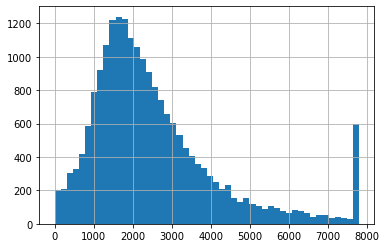

In [10]:
clipped_total_rooms3 = ZscoreOutlierClipper().fit_transform(clipped_total_rooms2)
clipped_total_rooms3.hist(bins=50);

Lúc này, chặn trên đã dịch chuyển về phía trái của 8000.
Như vậy, phương pháp z score khá nhạy cảm với nhiễu lớn và không ổn định bằng phương pháp box plot.


## Dữ liệu hạng mục

Khác với trường hợp dữ liệu số, dữ liệu ngoại lệ trong các trường thông tin hạng mục khó phát hiện ra hơn. Một phần vì việc khó vẽ histogram, đặc biệt khi có nhiều giá trị hạng mục khác nhau, một phần khác các điểm ngoại lệ dạng này cần phải có kiến thức chuyên môn về các giá trị hợp lệ.

Với dữ liệu hạng mục, giá trị ngoại lệ có thể xảy ra ở một trong các trường hợp sau:

* Do sai khác trong cách nhập dữ liệu. Ví dụ, một phần dữ liệu thu được ở dạng viết hoa, một phần nhỏ khác lại ở dạng viết thường, như "VIỆT NAM" và "việt nam". Một ví dụ khác là việc một hạng mục có nhiều tên khác nhau, chẳng hạn "Thành phố" và "Tp". Trong trường hợp này, ta cần chuẩn hóa các giá trị về cùng một dạng để loại bỏ các điểm ngoại lệ.

* Do lỗi chính tả khiến một vài mẫu có giá trị khác hẳn với phần còn lại. Để xử lý dữ liệu sai lỗi chính tả, ta có thể vẽ histogram thể hiện tần suất của từng giá trị trong toàn bộ dữ liệu. Thông thường, những lỗi chính tả nằm ở những hạng mục có tần suất thấp. Những lỗi này cần phải được sửa trước khi đi vào bước tiếp theo.

* Một vài hạng mục xuất hiện quá ít trong dữ liệu. Các giá trị này có thể cần xử lý hoặc không, câu trả lời có thể đạt được thông qua thí nghiệm. Những hạng mục có tần suất thấp dễ khiến mô hình bị overfitting. Tuy nhiên, có những trường hợp mà những giá trị này có quan hệ chặt chẽ tới cột nhãn ta không nên bỏ đi. Nếu cần phải xử lý, một cách thông dụng là nhóm các hạng mục có tần suất thấp thành một hạng mục mới, có thể đặt tên là "rare" (_khan hiếm_).

* Hạng mục không xuất hiện trong tập huấn luyện. Rất nhiều trường hợp mà một giá trị ở bước "Serving" chưa từng xuất hiện trong cơ sở dữ liệu cũ. Điều này thường xuyên xảy ra với các hệ thống gợi ý khi người dùng và sản phẩm thay đổi liên tục. Với trường hợp này, cách phổ biến là tạo thêm một hạng mục mới gọi là "unknown" (_chưa biết_) khi xây dựng dữ liệu huấn luyện. Bất cứ khi nào có một giá trị mới, ta có thể xếp nó vào hạng mục này.

Một phương pháp cũng được sử dụng nhiều thời gian gần đây đối với hai trường hợp cuối cùng là {ref}`sec_hashing`, chúng ta sẽ tìm hiểu sau.

Dưới đây là histogram của cột `ocean_proximity` của tập dữ liệu California Housing. Đây là một trường dữ liệu hạng mục với năm giá trị khác nhau. Ở đây, hạng mục `ISLAND` có tần suất rất thấp nhưng chúng ta không thể bỏ qua.

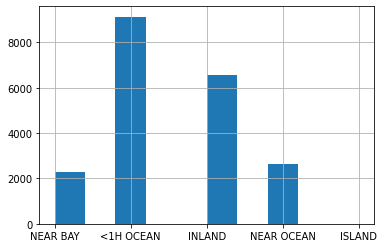

In [11]:
df_housing["ocean_proximity"].hist();

Để quyết định xem ta có nên gộp `ISLAND` vào một trong các hạng mục còn lại không, ta có thể vẽ histogram theo cột nhãn, ở đây là `medien_house_value` với các giá trị khác nhau của `ocean_proximity`.

Text(0.5, 1.0, 'NOT ISLAND')

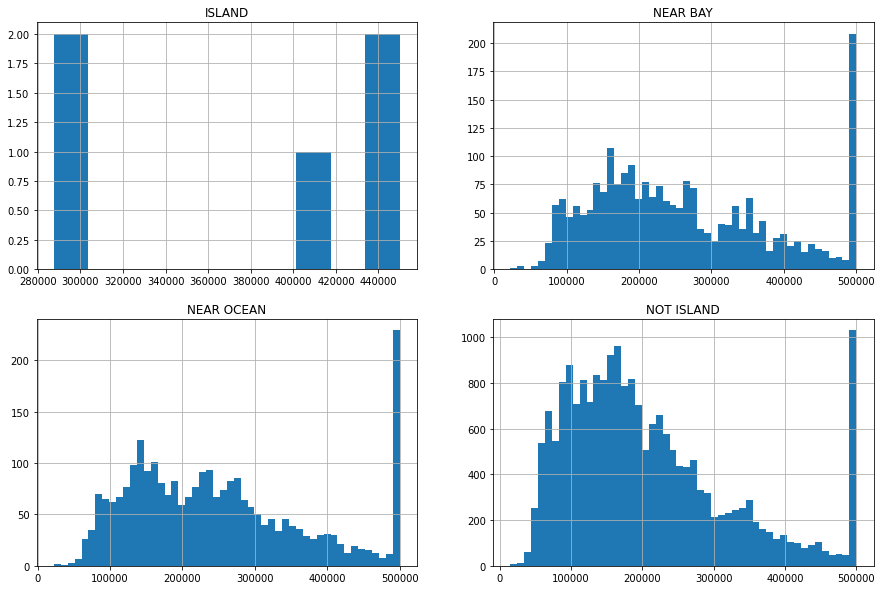

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10));
df_housing[df_housing["ocean_proximity"] == "ISLAND"]["median_house_value"].hist(ax=axes[0][0])
axes[0][0].set_title("ISLAND")
df_housing[df_housing["ocean_proximity"] == "NEAR BAY"]["median_house_value"].hist(bins=50, ax=axes[0][1]);
axes[0][1].set_title("NEAR BAY")
df_housing[df_housing["ocean_proximity"] == "NEAR OCEAN"]["median_house_value"].hist(bins=50, ax=axes[1][0]);
axes[1][0].set_title("NEAR OCEAN")
df_housing[df_housing["ocean_proximity"] != "ISLAND"]["median_house_value"].hist(bins=50, ax=axes[1][1]);
axes[1][1].set_title("NOT ISLAND")

Ta có thể thấy rằng các căn nhà ở `ISLAND` có giá trị khá cao, từ khoảng $300k trở lên trong khi các khu vực khác có giá tập trung ở các phân khúc thấp hơn. Dường như `ISLAND` là một dấu hiệu tốt để định giá các căn nhà và nên được đối xử như một hạng mục riêng biệt. Tuy nhiên, bạn cũng có thể thử gộp `ISLAND` với một hạng mục nào đó và thử.

Trong Machine Learning, không có một phương pháp tuyệt đối đúng nhất. Việc xác định ý tưởng nào tốt hơn hầu hết dựa trên nhiều thí nghiệm. Với ràng buộc về thời gian và nguồn lực, bạn nên bắt đầu với những ý tưởng mà bạn có cảm quan sẽ mang lại kết quả tốt hơn trước.

Nếu muốn gộp `ISLAND` vào một giá trị khác, chẳng hạn `NEAR BAY`, ta có thể làm như sau:

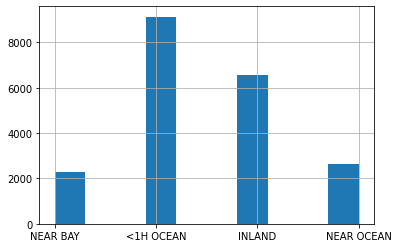

In [13]:
df_housing[df_housing["ocean_proximity"] == "ISLAND"] = "NEAR BAY"
df_housing["ocean_proximity"].hist();

Sau khi gộp, ta thấy rằng cột `ocean_proximity` chỉ còn lại bốn hạng mục.

[^1]: Đôi khi được gọi là "ngoại lai".

[^2]: Giá trị đặc biệt này cũng có thể mang lại nhiều thông tin cho việc dự đoán. Cần kiểm tra kỹ mối tương quan giữa cột dữ liệu tương ứng và cột nhãn.